# Image Classification CNN - Fashion MNIST

This tutorial demonstrates training a simple Convolutional Neural Network (CNN) to classify MNIST digits.<br>
This simple network will achieve over 99% accuracy on the MNIST test set. Because this tutorial uses the Keras Sequential API, creating and training our model will take just a few lines of code.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta0


## Download and prepare the MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

    Label	Class
        0	T-shirt/top
        1	Trouser
        2	Pullover
        3	Dress
        4	Coat
        5	Sandal
        6	Shirt
        7	Sneaker
        8	Bag
        9	Ankle boot

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [5]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28, 1)
60000
[9 0 0 ... 3 0 5]


TypeError: Invalid dimensions for image data

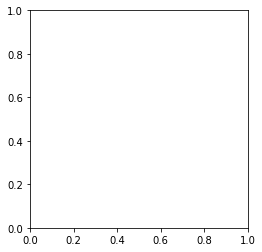

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of <br>Conv2D (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and <br>MaxPooling2D (https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.
<br><br>
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to color channels, MNIST has one (because the images are grayscale), whereas a color image has three (R,G,B). In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. We do this by passing the argument input_shape to our first layer.

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete our model, we will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation.

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

## Compile and train the model

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=5,
                    validation_data=(test_images, test_labels),
                    validation_steps=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 728us/sample - loss: 0.2141 - accuracy: 0.9233 - val_loss: 0.2799 - val_accuracy: 0.9031
Epoch 2/5
60000/60000 [==============================] - 43s 715us/sample - loss: 0.1958 - accuracy: 0.9297 - val_loss: 0.3097 - val_accuracy: 0.8961
Epoch 3/5
60000/60000 [==============================] - 43s 721us/sample - loss: 0.1850 - accuracy: 0.9333 - val_loss: 0.3035 - val_accuracy: 0.9023
Epoch 4/5
60000/60000 [==============================] - 43s 711us/sample - loss: 0.1710 - accuracy: 0.9381 - val_loss: 0.3025 - val_accuracy: 0.9009
Epoch 5/5
60000/60000 [==============================] - 43s 717us/sample - loss: 0.1620 - accuracy: 0.9413 - val_loss: 0.3052 - val_accuracy: 0.9007


## Evaluate the model

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.3052 - accuracy: 0.9007


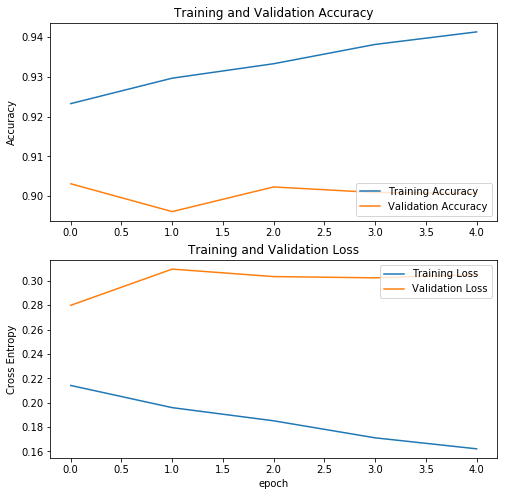

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [49]:
print(test_acc)
predictions = model.predict(test_images)
pred0 = predictions[0]
print(pred0)
print(np.argmax(pred0))

0.9007
[1.0069057e-03 2.7463166e-02 2.8099981e-04 1.7309495e-03 4.2266487e-03
 7.0967518e-02 3.8541737e-03 6.9761045e-02 8.1927443e-01 1.4342536e-03]
8


## Export to Tensorflow Lite

In [51]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [53]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [54]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [7]:
# Get output tensors.
for c_input_details in input_details:
    print(c_input_details['name'])

for c_output_details in output_details:
    print(c_output_details['name'])

NameError: name 'input_details' is not defined

In [8]:
open("converted_model.tflite", "wb").write(tflite_model)

NameError: name 'tflite_model' is not defined